In [1]:
%pylab inline
import pygrib
from mpl_toolkits.basemap import Basemap
import os
import scipy.ndimage.interpolation
import pyproj
import shapely.geometry
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
import descartes
import skimage.measure
import shapely.ops
import shapely.wkt
import functools
import cartopy
import cartopy.crs
import cartopy.io.img_tiles
import hashlib

Populating the interactive namespace from numpy and matplotlib


In [ ]:
grbs = pygrib.open("WeatherScrape/smhi/NS01_SURF_201809031800+000H00M.grib")
grb = grbs[12]

In [7]:
grb

12:V-comp of Current:cm/s (instant):regular_ll:heightAboveGround:level 0:fcst time 0 hrs:from 201809031800

In [9]:
grb.projparams

{'a': 6367470, 'b': 6367470, 'proj': 'cyl'}

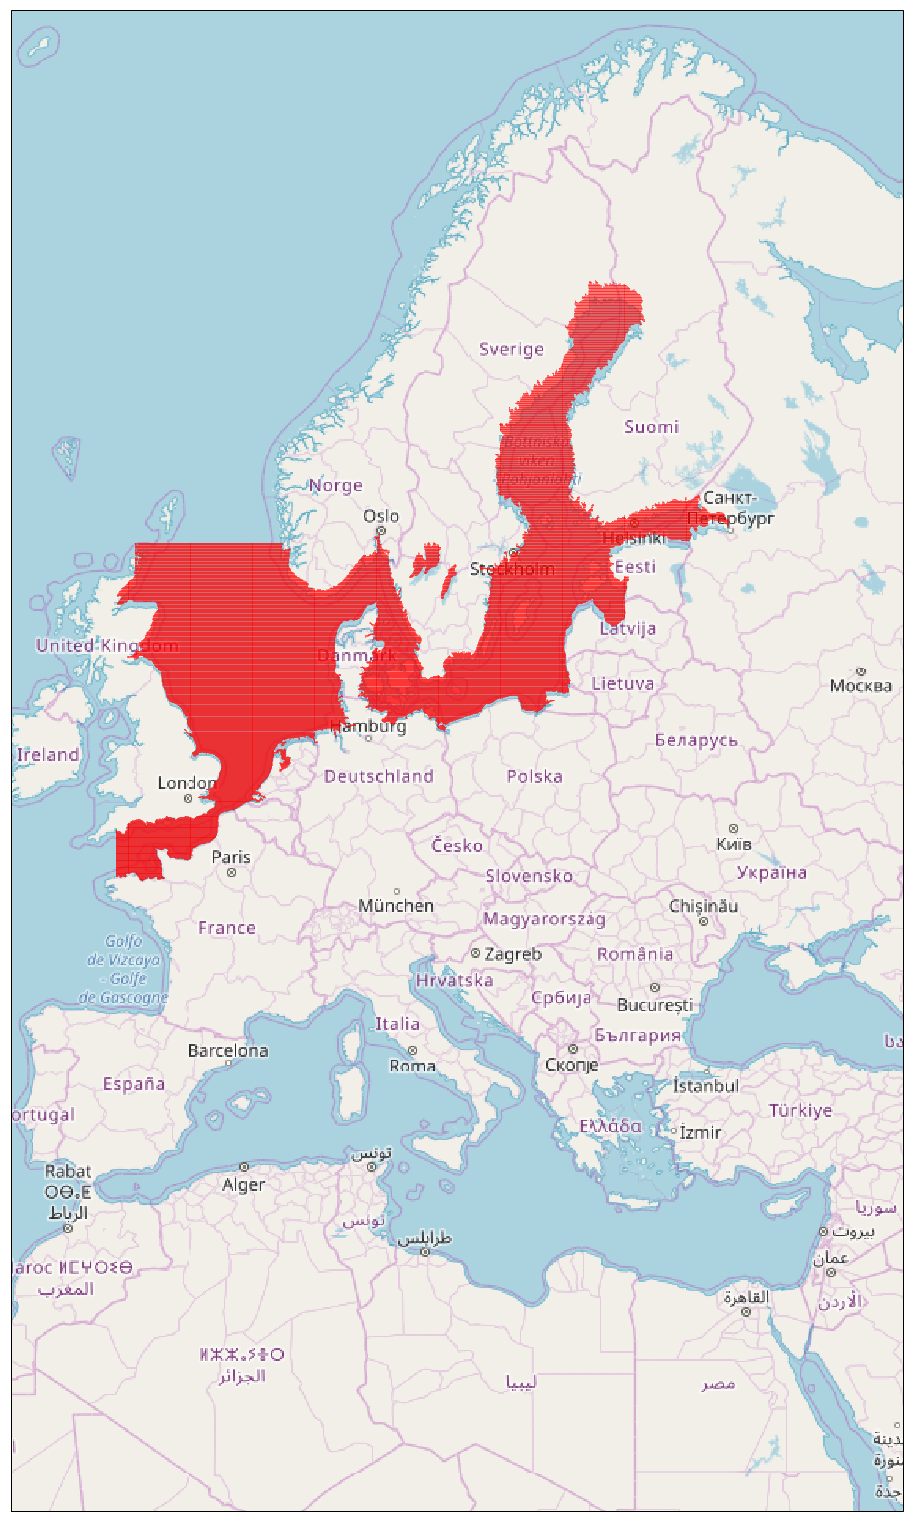

In [8]:
BLUE = '#6699cc'

fig = plt.figure(figsize=(16,35))
tiles = cartopy.io.img_tiles.OSM()
ax = plt.axes(projection=tiles.crs)
ax.set_extent([-10,40,20,70])
ax.add_image(tiles, 4)

wgs84 = cartopy.crs.Geodetic()
def tr(x, y):
    return tiles.crs.transform_point(x, y, wgs84)

lats, lons = grb.latlons()
n = scipy.ndimage.morphology.binary_fill_holes(
        (grb.values >= grb.minimum) & (grb.values <= grb.maximum))
xys = tiles.crs.transform_points(wgs84, lons[n], lats[n])[:,:2]
ax.plot(xys[:,0], xys[:,1], ",r", alpha=0.3)

plt.show()